In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycirclize import Circos
from io import StringIO
from matplotlib.patches import Patch
import pycountry
import pycirclize.utils
import openpyxl
from Bio import Phylo
from pycirclize.utils import load_example_image_file
import  matplotlib.lines as mlines

In [5]:
detailed_data = pd.read_csv('data/detailed_flow_data.csv')
print(detailed_data.shape)
detailed_data.head()

(3480587, 7)


,Unnamed: 0,author_id,prev_institution_id,institution_id,stay_time,move_time,level_distance
0,34,A101307478,I130238516,I74801974,-2.0,1964,3
1,57,A1022461106,I78577930,I39694355,0.0,1961,0
2,94,A1039849043,I27837315,I84392919,0.0,1962,1
3,123,A1051917962,I32971472,I124357947,-4.0,1964,3
4,158,A106070914,I63190737,I1322918889,0.0,1960,1


In [4]:

def divide_years(year):
    if 2015 <= year <= 2021:
        return "2015-2021"
    start_year = 1960
    end_year = 2014
    interval = 5
    if year == end_year:
        return f"{year - interval + 1}-{year}"
    group_start = start_year + (year - start_year) // interval * interval
    group_end = group_start + interval - 1
    return f"{group_start}-{group_end}"

detailed_data['Time'] = detailed_data['move_time'].apply(divide_years)

In [5]:
Movefrequence = detailed_data.groupby(['Time','level_distance']).agg({
    'author_id':'count'

}).reset_index()
Movefrequence.columns = ['Time','level_distance','Move_frequence']

In [6]:
figszieAll = (8,4)
markersize = 20
linewidth = 3.5
legend_fontsize = 15
legend_markersize = 10
legend_linewidth = 3
legend_height = 40
legend_width = 60

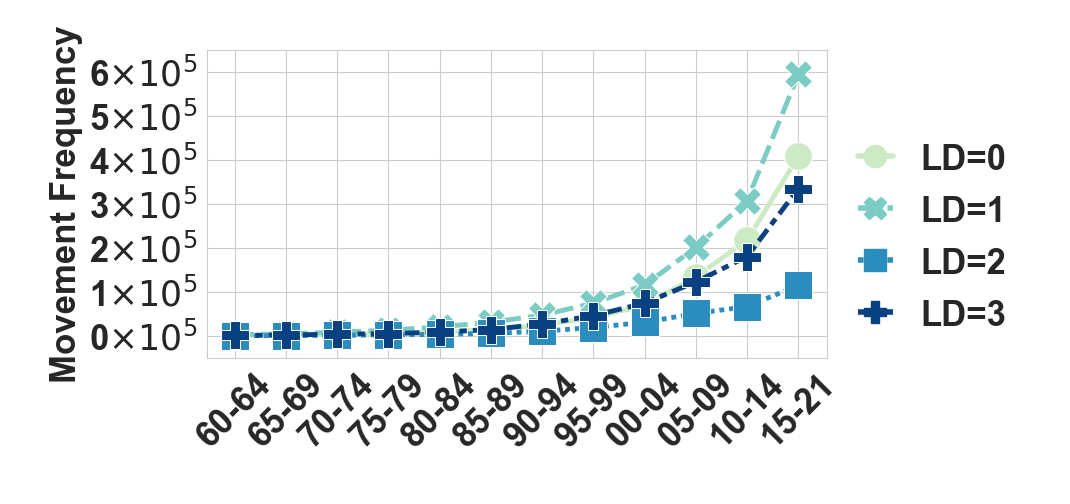

In [23]:
colordict = {
    0:'#ccebc5',
    1:'#7bccc4',
    2:'#2b8cbe',
    3:'#084081',
}
markerdict = {
    0:'o',
    1:'X',
    2:'s',
    3:'P',
}
styledict = {
    0:'-',
    1:'--',
    2:':',
    3:'-.',
}
plt.figure(figsize=figszieAll, dpi=100)
sns.lineplot(data=Movefrequence, x='Time', y='Move_frequence', hue='level_distance', style="level_distance",
             markers=markerdict, style_order=styledict,
             palette=colordict,
             linewidth=linewidth, markersize=markersize, legend=True)
plt.ylabel('Movement Frequency', fontsize=25, weight='bold')
plt.xlabel('', fontsize=1, weight='bold')
maxNum = max(Movefrequence.Move_frequence)//100000+1
minNum = min(Movefrequence.Move_frequence)//100000
plt.ylim([(minNum-0.5)*100000,(maxNum+0.5)*100000])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=['60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','00-04','05-09','10-14','15-21'],
           fontsize=25, weight='bold',rotation = 45)
plt.yticks([0,100000,200000,300000,400000,500000,600000],
           [str(ii)+r'$\times 10^5$' for ii in range(minNum,maxNum+1)],
            fontsize=25, weight='bold')
# plt.yticks([ii*100000 for ii in list(range(minNum,maxNum+1))],
#            # label = [str(ii)+r'$\times 10^6$' for ii in range(minNum,maxNum+1)],
#            label = [str(ii) for ii in range(minNum,maxNum+1)],
#            fontsize=20, weight='bold')


plt.title('', fontsize=1, weight='bold')

LD0 = mlines.Line2D([], [], color = colordict[0],
                    marker=markerdict[0], markersize = 16,
                    linestyle=styledict[0],linewidth = 4,
                     label = 'LD=0')
LD1 = mlines.Line2D([], [], color = colordict[1],
                   marker=markerdict[1], markersize = 16,
                    linestyle=styledict[1],linewidth = 4,
                    label = 'LD=1')
LD2 = mlines.Line2D([], [], color = colordict[2],
                    marker=markerdict[2], markersize = 16,
                    linestyle=styledict[2],linewidth = 4,
                    label = 'LD=2')
LD3 = mlines.Line2D([], [], color = colordict[3],
                    marker=markerdict[3], markersize = 16,
                    linestyle=styledict[3],linewidth = 4,
                    label = 'LD=3')
# 创建图例，只用这些专门的线对象
plt.legend(handles=[LD0, LD1, LD2, LD3],  loc = 'upper left',  prop = {'weight':'bold', 'size':25},  bbox_to_anchor=(1, 0.8), frameon = True)

# legend = plt.legend(fontsize=legend_fontsize, frameon=True, bbox_to_anchor=(1, 0.8), ncols=1, prop={'size': 20})
# # 设置每个缩略图中线段或点的大小为20
# for handle in legend.legendHandles:
#     if isinstance(handle, matplotlib.lines.Line2D):
#         handle.set_markersize(legend_markersize)
#         handle.set_linewidth(legend_linewidth)
#         # handle.set(20)
#     elif isinstance(handle, matplotlib.patches.Patch):
#         handle.set_height(legend_height)
#         handle.set_width(legend_width)
#     # elif isinstance(handle, Line2D):

# 显示绘制结果
plt.show()